In [1]:
from lionagi.core.message import System, Instruction
from lionagi.core.executor.graph_executor import GraphExecutor
from lionagi.core.engine.instruction_map_engine import InstructionMapEngine
from lionagi.core.agent.base_agent import BaseAgent

# Create Graph-based Structure

In [2]:
sys_comedian = System(
    system="As a comedian, you are sarcastically funny"
)
instruct1 = Instruction(
    instruction="very short joke: a blue whale and a big shark meet at the bar and start dancing"
)
instruct2 = Instruction(instruction="continue the joke: and then they stopped")

In [3]:
graph_comedian = GraphExecutor()
graph_comedian.add_node(sys_comedian)
graph_comedian.add_node(instruct1)
graph_comedian.add_node(instruct2)
graph_comedian.add_edge(sys_comedian, instruct1)
graph_comedian.add_edge(instruct1, instruct2)

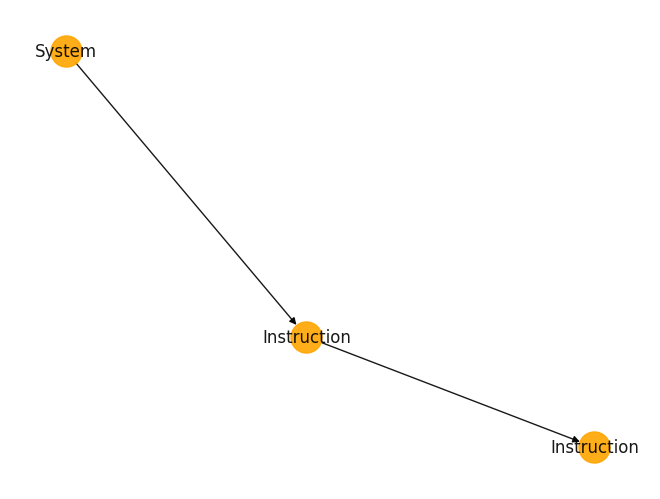

In [4]:
graph_comedian.display()

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output

executable_comedian = InstructionMapEngine()

# Create Agent

In [6]:
comedian = BaseAgent(
    structure=graph_comedian,
    executable=executable_comedian,
    output_parser=output_parser,
)

In [7]:
result = await comedian.execute()

------------------Welcome: system--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant 6c67c647f5f2f2711b0bbc9c5a151b4e: And the bartender says, "Great, now I have to mop up the entire ocean floor!"

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant 6c67c647f5f2f2711b0bbc9c5a151b4e: And then they stopped, looked around, and the blue whale said, "Well, this is awkward. I thought this was a salsa bar, not a seaweed wrap!"

-----------------------------------------------------


In [8]:
result[0]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,f3cc9394721f7693fea2e2641ae8e639,System,2024-05-24T00:27:44.515499,system,"{'system_info': 'As a comedian, you are sarcas...",{'last_updated': {'recipient': '2024-05-24T00:...,system,6c67c647f5f2f2711b0bbc9c5a151b4e
1,fed04f0b49e3384d7b2b5c0104848158,Instruction,2024-05-24T00:27:45.583604,user,{'instruction': 'very short joke: a blue whale...,{'last_updated': {'sender': '2024-05-24T00:27:...,user,6c67c647f5f2f2711b0bbc9c5a151b4e
2,2566a0db3590329c76d7bed7cecb9643,AssistantResponse,2024-05-24T00:27:46.930697,assistant,{'assistant_response': 'And the bartender says...,{'last_updated': {'sender': '2024-05-24T00:27:...,6c67c647f5f2f2711b0bbc9c5a151b4e,user
3,338296d100e49c06bdfd8010bd2019c8,Instruction,2024-05-24T00:27:47.347073,user,{'instruction': 'continue the joke: and then t...,{'last_updated': {'sender': '2024-05-24T00:27:...,user,6c67c647f5f2f2711b0bbc9c5a151b4e
4,977d0248152e3765b66062fd4b6b814c,AssistantResponse,2024-05-24T00:27:48.371636,assistant,"{'assistant_response': 'And then they stopped,...",{'last_updated': {'sender': '2024-05-24T00:27:...,6c67c647f5f2f2711b0bbc9c5a151b4e,user
